#Assignment 3.2: LSTM ASSIGNMENT

This assignment is aimed at implementing LSTMs that we had learnt in class. In this task, we'll implement a model that takes text data as input and returns the emotion behind the text.

## TEXT PRE-PROCESSING FOR NLP

**Import the dataset.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
import pandas as pd
df = pd.read_csv('new_dataset.csv')
df

sentiment                                               text
0  Negative  @xnausikaax oh no! where did u order from? tha...
1  Negative  A great hard training weekend is over.  a coup...
2  Negative  Right, off to work  Only 5 hours to go until I...
3  Negative                    I am craving for japanese food 
4  Negative  Jean Michel Jarre concert tomorrow  gotta work...

**The dataset clearly has a large no. of redundant words, because that is simply how we humans talk. We'll first remove the stopwords.**


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

In [ ]:
def stopremover(text):

  words = text.split()
  filtered_words = []

  for word in words:
      if word.lower() not in stop_words:
          filtered_words.append(word)

  good_text = ' '.join(filtered_words)
  return good_text

df['text'] = df['text'].apply(stopremover)

df
   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


sentiment                                               text
0  Negative   @xnausikaax oh no! u order from? that's horrible
1  Negative  A great hard training weekend over. couple day...
2  Negative            Right, work Only 5 hours go I'm free xD
3  Negative                            I craving japanese food
4  Negative  Jean Michel Jarre concert tomorrow gotta work ...

**Next, we'll remove some other info we dont need right now, like the handle names.**

In [ ]:
def remove_handles(text):
    words = text.split()
    cleaned_words = []

    for word in words:
        if not word.startswith('@'):
            cleaned_words.append(word)

    return ' '.join(cleaned_words)

df['text'] = df['text'].apply(remove_handles)

df

**Now, we'll perform stemming, wherein we'll reduce the words to their root form.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    words = text.split()
    stemmed_words = []

    for word in words:
        stemmed_word = stemmer.stem(word)
        stemmed_words.append(stemmed_word)

    return ' '.join(stemmed_words)

df['text'] = df['text'].apply(stem_text)

df

sentiment                                               text
0  Negative                     oh no u order from that s horr
1  Negative  a great hard training weekend over couple days...
2  Negative             right work only 5 hours go i m free xd
3  Negative                            i craving japanese food
4  Negative  jean michel jarre concert tomorrow gotta work ...

**Now that we are done with pre-processing, lets see what the gist of the data is that our model should capture.**
**Generate a word-cloud for the positive and negative words of the dataset.**

In [ ]:
#ENTER YOUR CODE HERE

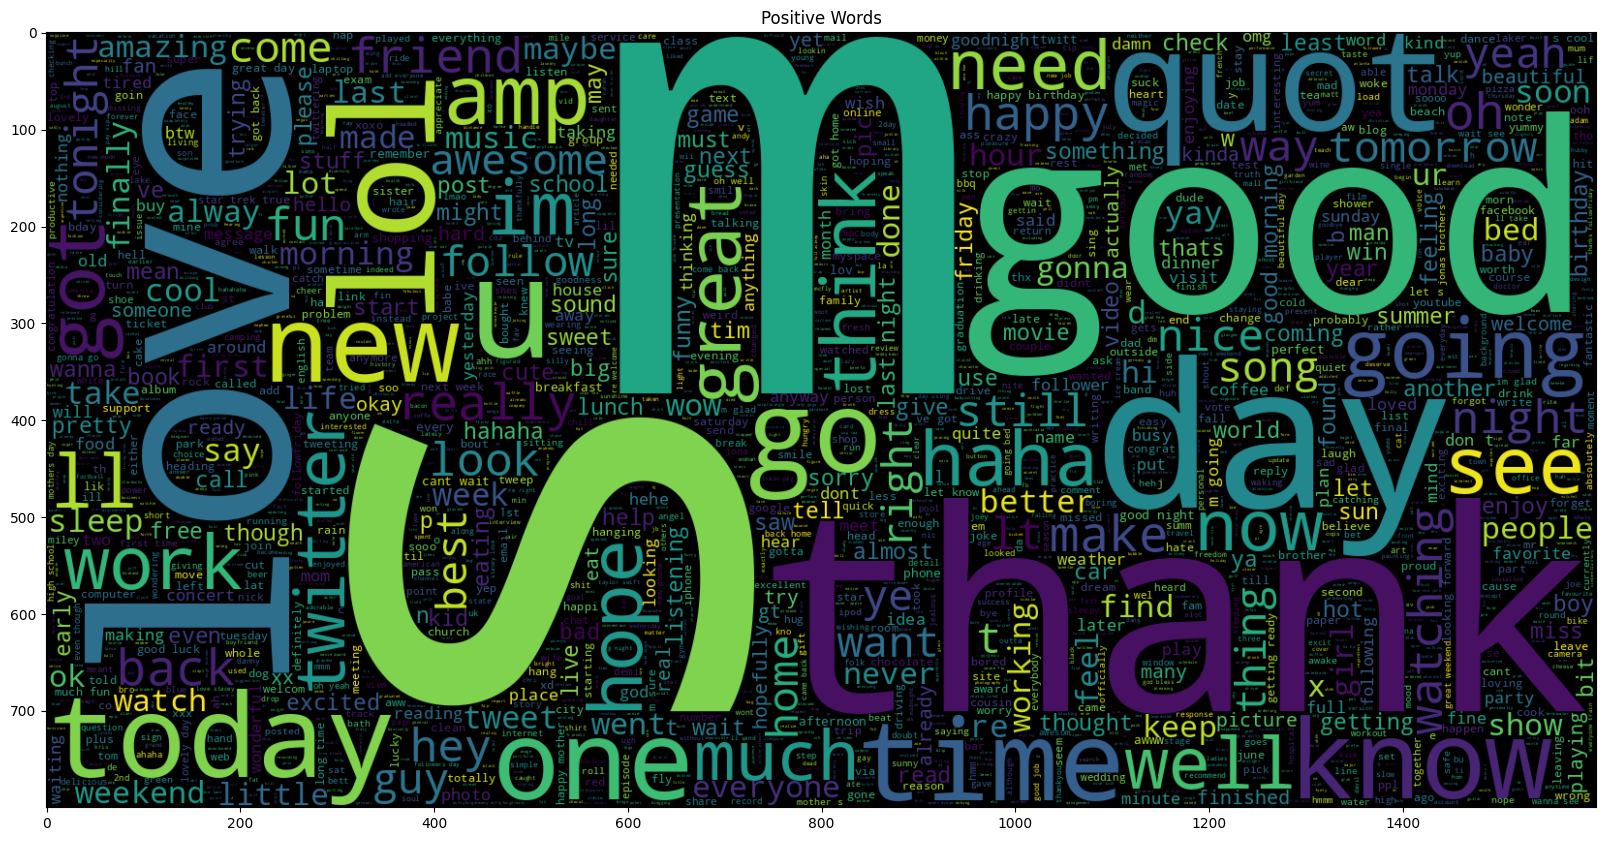

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = ' '.join(df[df['sentiment'] == 'Positive']['text'])
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['text'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment WordCloud')
plt.show()

wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment WordCloud')
plt.show()

In [ ]:
#ENTER YOUR CODE HERE

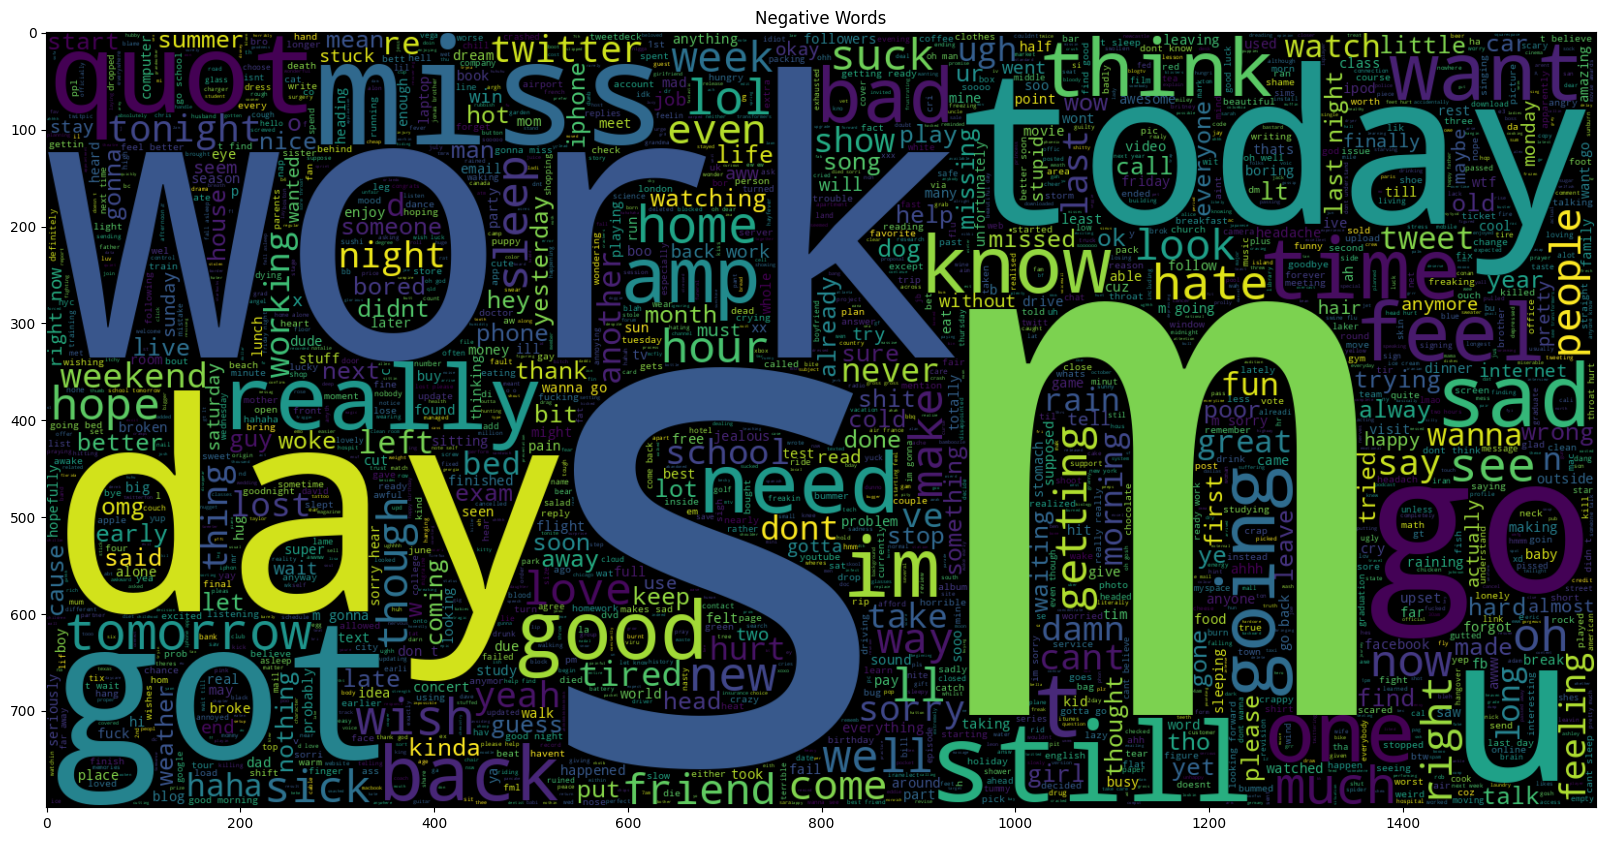

**I'd like to point out that 'Work' is bigger in the negative words display than it is in the positive words one.**

## TRAINING

**We have now processed the data for training. It's time for us to split it into training and test splits.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
from sklearn.model_selection import train_test_split

x = df['text']
y = df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)\

Training Set Size: 9000
Test Set Size: 1000


**It is now time to convert our text sequences into numbers like the model will understand. Fit a tokenizer on the training dataset for the same. Let the vocab size be the no of unique words itself.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='')

tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index

vocab_size = len(tokenizer.word_index)
print("Vocab size:", vocab_size)

Vocabulary Size : 13511


**Now transform the training and testing word sequences.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

Training data:
[1, 25, 411, 5140, 954, 1222, 954, 20, 894, 107, 5141]
Testing data:
[322, 677, 2477, 2488, 181, 618]


**It is necessary for the simplicity of the model that each text sequence be of the same length. Pad the sequences to make this possible.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = max(len(seq) for seq in x_train_seq)

x_train_pad = pad_sequences(x_train_seq, maxlen=max_length, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_length, padding='post', truncating='post')

print("Padded training shape:", x_train_pad.shape)
print("Padded test shape:", x_test_pad.shape)

Training data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    1   25  411
 5140  954 1222  954   20  894  107 5141]
Testing data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  322  677 2477 2488  181  618]


**Label encode y.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
y_train= y_train.map({'Negative': 0, 'Positive': 1})
y_test= y_test.map({'Negative': 0, 'Positive': 1})
y_test

The training labels:
[0 0 0 ... 1 0 1]
The testing labels:
[1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 

**FOLLOWING CODE IS FOR CREATING WORD EMBEDDINGS. DON'T TOUCH IT.JUST REPLACE VOCAB_SIZE WITH THE VOCABULARY SIZE OBTAINED EARLIER.**

In [ ]:
import tensorflow as tf
import numpy as np
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-06-22 11:20:38--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-06-22 11:20:38--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-22 11:20:38--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../content/best_model.hdf5'
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
embedding_layer = tf.keras.layers.Embedding(vocab_size,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)


Found 400000 word vectors.


![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

**You should read up on why we added the previou code block.The embedding layer created is to be used in the model. Use the model summary to build the rest. Compile the model with Adam and a suitable loss function.**

In [ ]:
from tensorflow.keras.layers import (
    Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,
    SpatialDropout1D, GlobalMaxPooling1D, Embedding
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l2
sequence_input = Input(shape=(max_length,), dtype='int32')
embedding_layer.trainable = True
x = embedding_layer(sequence_input)

x = SpatialDropout1D(0.4)(x)
x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))(x)
x = Conv1D(64, kernel_size=3, activation='relu', padding='valid')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=sequence_input, outputs=output)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 36)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 36, 300)           4053300   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 36, 300)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 64)            96064     
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 512)               6604

**Train the model on the train split, and validate it on the test split.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

earlystop = EarlyStopping(
    monitor='val_accuracy',
    patience=4,
    restore_best_weights=True,
    verbose=1
)


history = model.fit(
    x_train_pad,
    y_train,
    epochs=42,
    batch_size=512,
    validation_data=(x_test_pad, y_test),
    callbacks=[checkpoint, earlystop],
    verbose=1
)

Epoch 1/10
9/9 [==============================] - 39s 3s/step - loss: 0.6791 - accuracy: 0.5733 - val_loss: 0.6374 - val_accuracy: 0.6330
Epoch 2/10
9/9 [==============================] - 19s 2s/step - loss: 0.6207 - accuracy: 0.6628 - val_loss: 0.6137 - val_accuracy: 0.6540
Epoch 3/10
9/9 [==============================] - 19s 2s/step - loss: 0.5882 - accuracy: 0.6919 - val_loss: 0.5981 - val_accuracy: 0.6700
Epoch 4/10
9/9 [==============================] - 15s 2s/step - loss: 0.5676 - accuracy: 0.7080 - val_loss: 0.5911 - val_accuracy: 0.6670
Epoch 5/10
9/9 [==============================] - 22s 3s/step - loss: 0.5480 - accuracy: 0.7160 - val_loss: 0.5849 - val_accuracy: 0.6890
Epoch 6/10
9/9 [==============================] - 13s 1s/step - loss: 0.5273 - accuracy: 0.7290 - val_loss: 0.5836 - val_accuracy: 0.6880
Epoch 7/10
9/9 [==============================] - 22s 2s/step - loss: 0.5094 - accuracy: 0.7477 - val_loss: 0.5846 - val_accuracy: 0.7070
Epoch 8/10
9/9 [==================

**Let's visualise the model's training history now.**

In [ ]:
#ENTER YOUR CODE HERE

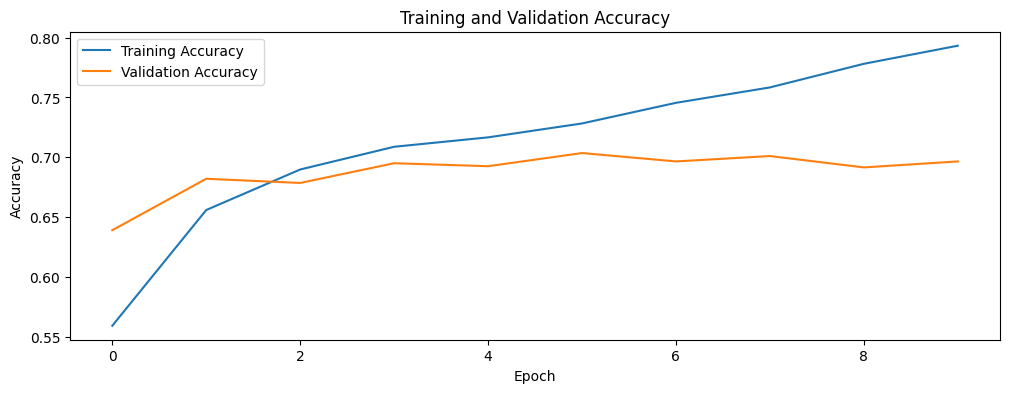

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#ENTER YOUR CODE HERE

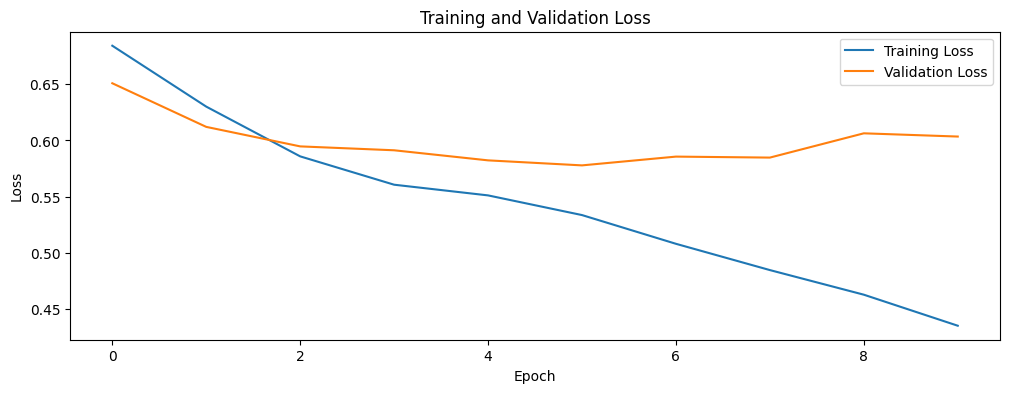

**Lets see what the accuracy of the model is.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_pad, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

63/63 [==============================] - 2s 24ms/step
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1012
           1       0.68      0.73      0.70       988

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000



**Take a random input sequence from the text series. First predict on it nd gets its sentiment. Then decode the string using the tokenizer, etc. you've developed and print the string as well.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
import random

i = random.randint(0, len(x_test) - 1)

text = x_test.iloc[i]
padded_input = x_test_pad[i].reshape(1, -1)

prediction = model.predict(padded_input)[0][0]
sentiment = "Positive" if prediction >= 0.5 else "Negative"

print("Text:")
print(text)

print(f"\nPredicted Sentiment: {sentiment}")

The chosen sequence is: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  402 2498  165   91  201    5]
1/1 [==============================] - 1s 835ms/step
The predicted sentiment is: ['Negative']
The original sentiment is: ['Negative']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#ENTER YOUR CODE HERE

**We can try this on a random string as well.**

In [ ]:
input_str = "I hate everyone on earth!"

seq = tokenizer.texts_to_sequences([input_str])
padded_seq = pad_sequences(seq, maxlen=max_length)

prediction = model.predict(padded_seq)[0][0]
sentiment = "Positive" if prediction >= 0.5 else "Negative"

print("Input String:")
print(input_str)

print(f"\nPredicted Sentiment: {sentiment}")

## GOOD JOB!